Importing dataset and libraries, then reducing dataset using stratified sampling based on target feature

In [2]:
import pandas as pd

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

Sanity checks

In [3]:
for column in df.columns:
    min_value = df[column].min()
    max_value = df[column].max()
    most_common_value = df[column].mode()[0]
    
    print(column.upper())
    print("min value:" + str(min_value))
    print("max value: " + str(max_value))
    print("max common value: " + str(most_common_value) + "\n")

SEX
min value:0.0
max value: 1.0
max common value: 1.0

AGE
min value:-5.0
max value: 101.0
max common value: 60.0

HYPERTENSION
min value:0
max value: 1
max common value: 0

HEART_DISEASE
min value:0
max value: 1
max common value: 0

EVER_MARRIED
min value:0
max value: 1
max common value: 1

WORK_TYPE
min value:0
max value: 4
max common value: 4

RESIDENCE_TYPE
min value:0
max value: 1
max common value: 1

AVG_GLUCOSE_LEVEL
min value:55.12
max value: 271.74
max common value: 94.39

BMI
min value:14.1
max value: 78.0
max common value: 31.4

SMOKING_STATUS
min value:0
max value: 1
max common value: 0

STROKE
min value:0
max value: 1
max common value: 0



Age feature contains values less than 0.
Proceed to drop them

EDA ON ORIGINAL DATASET

Categorical features frequencies

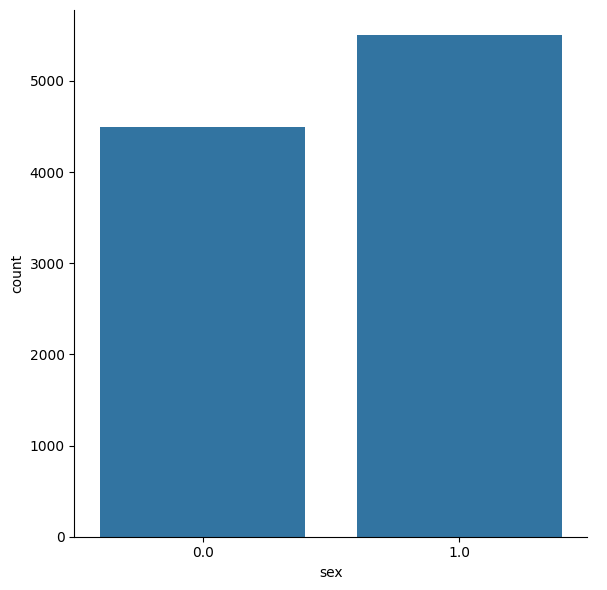

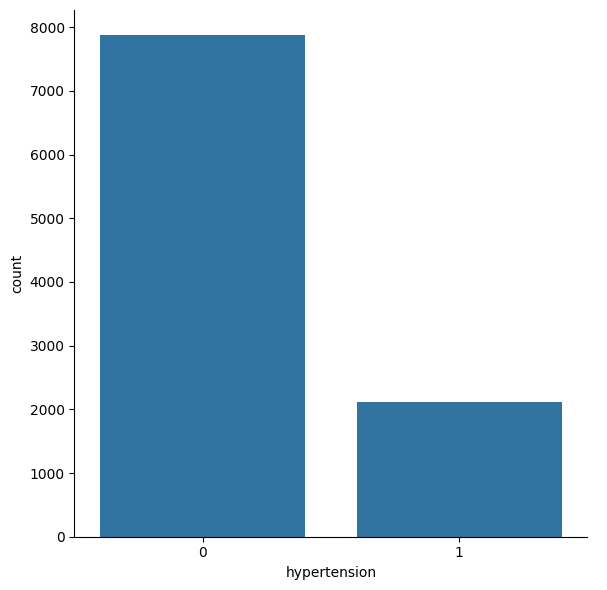

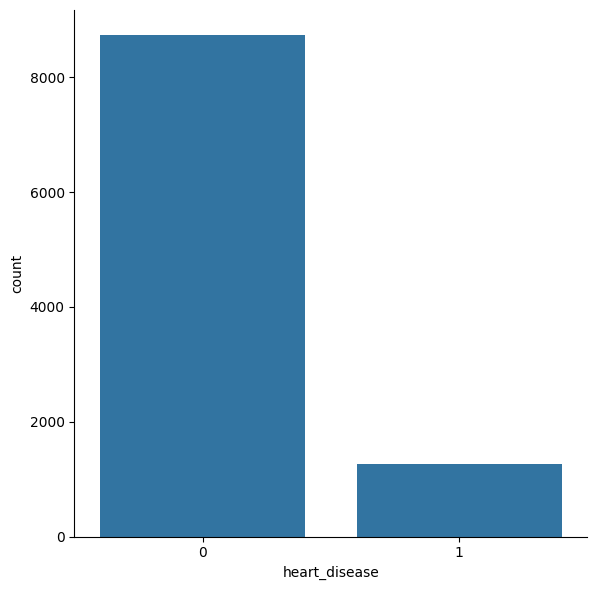

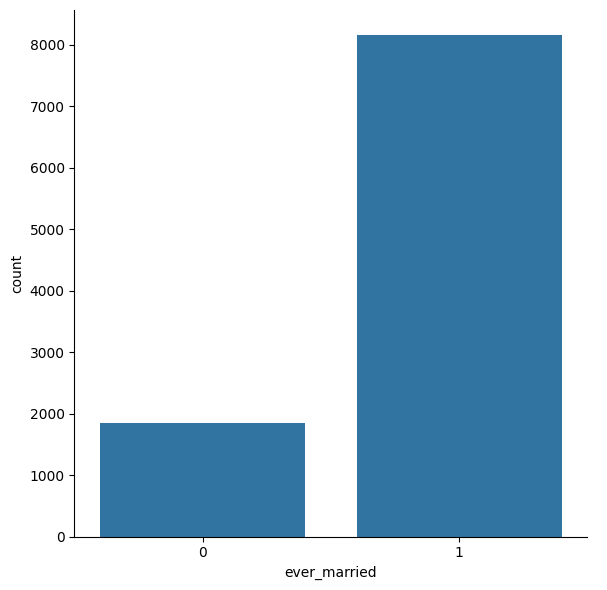

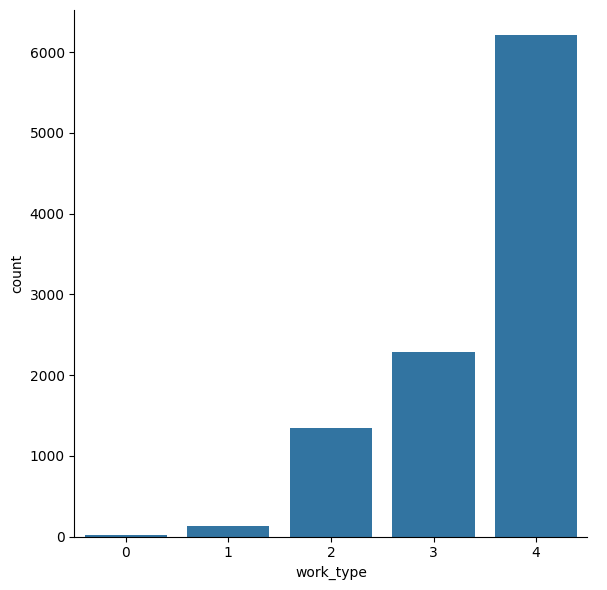

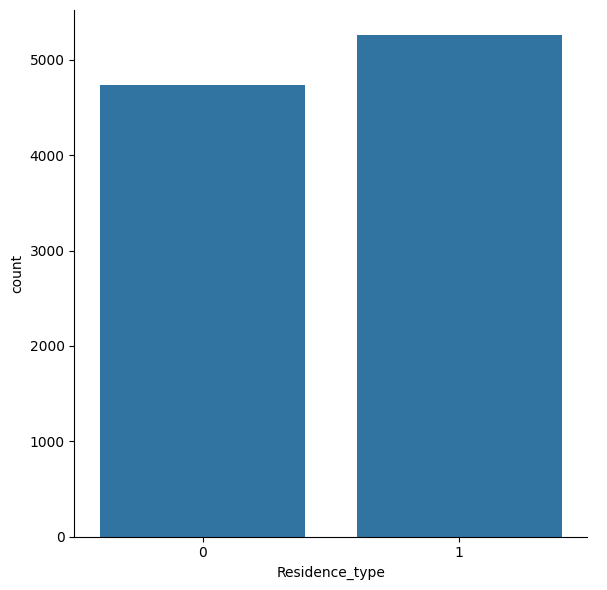

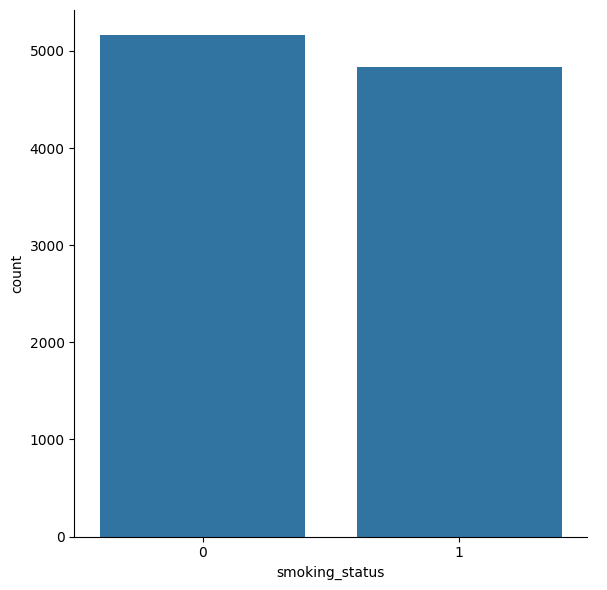

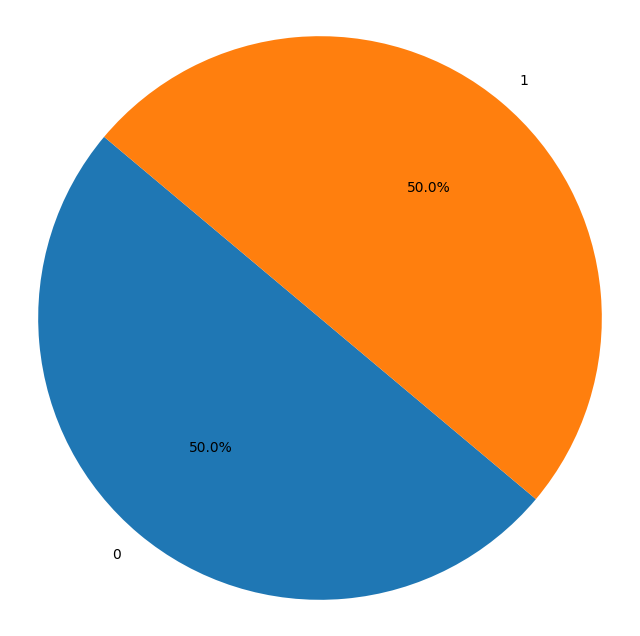

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

def plot_categorical_bar_distribution():
    categorical_df = df[categorical_features]
    for column in categorical_features:
        sns.catplot(x=column, kind="count", data=categorical_df, height=6, aspect=1)
    plt.figure(figsize=(8, 8))
    stroke_counts = df['stroke'].value_counts()
    labels = stroke_counts.index
    sizes = stroke_counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.show()
        
                
plot_categorical_bar_distribution()


Numerical features distribution

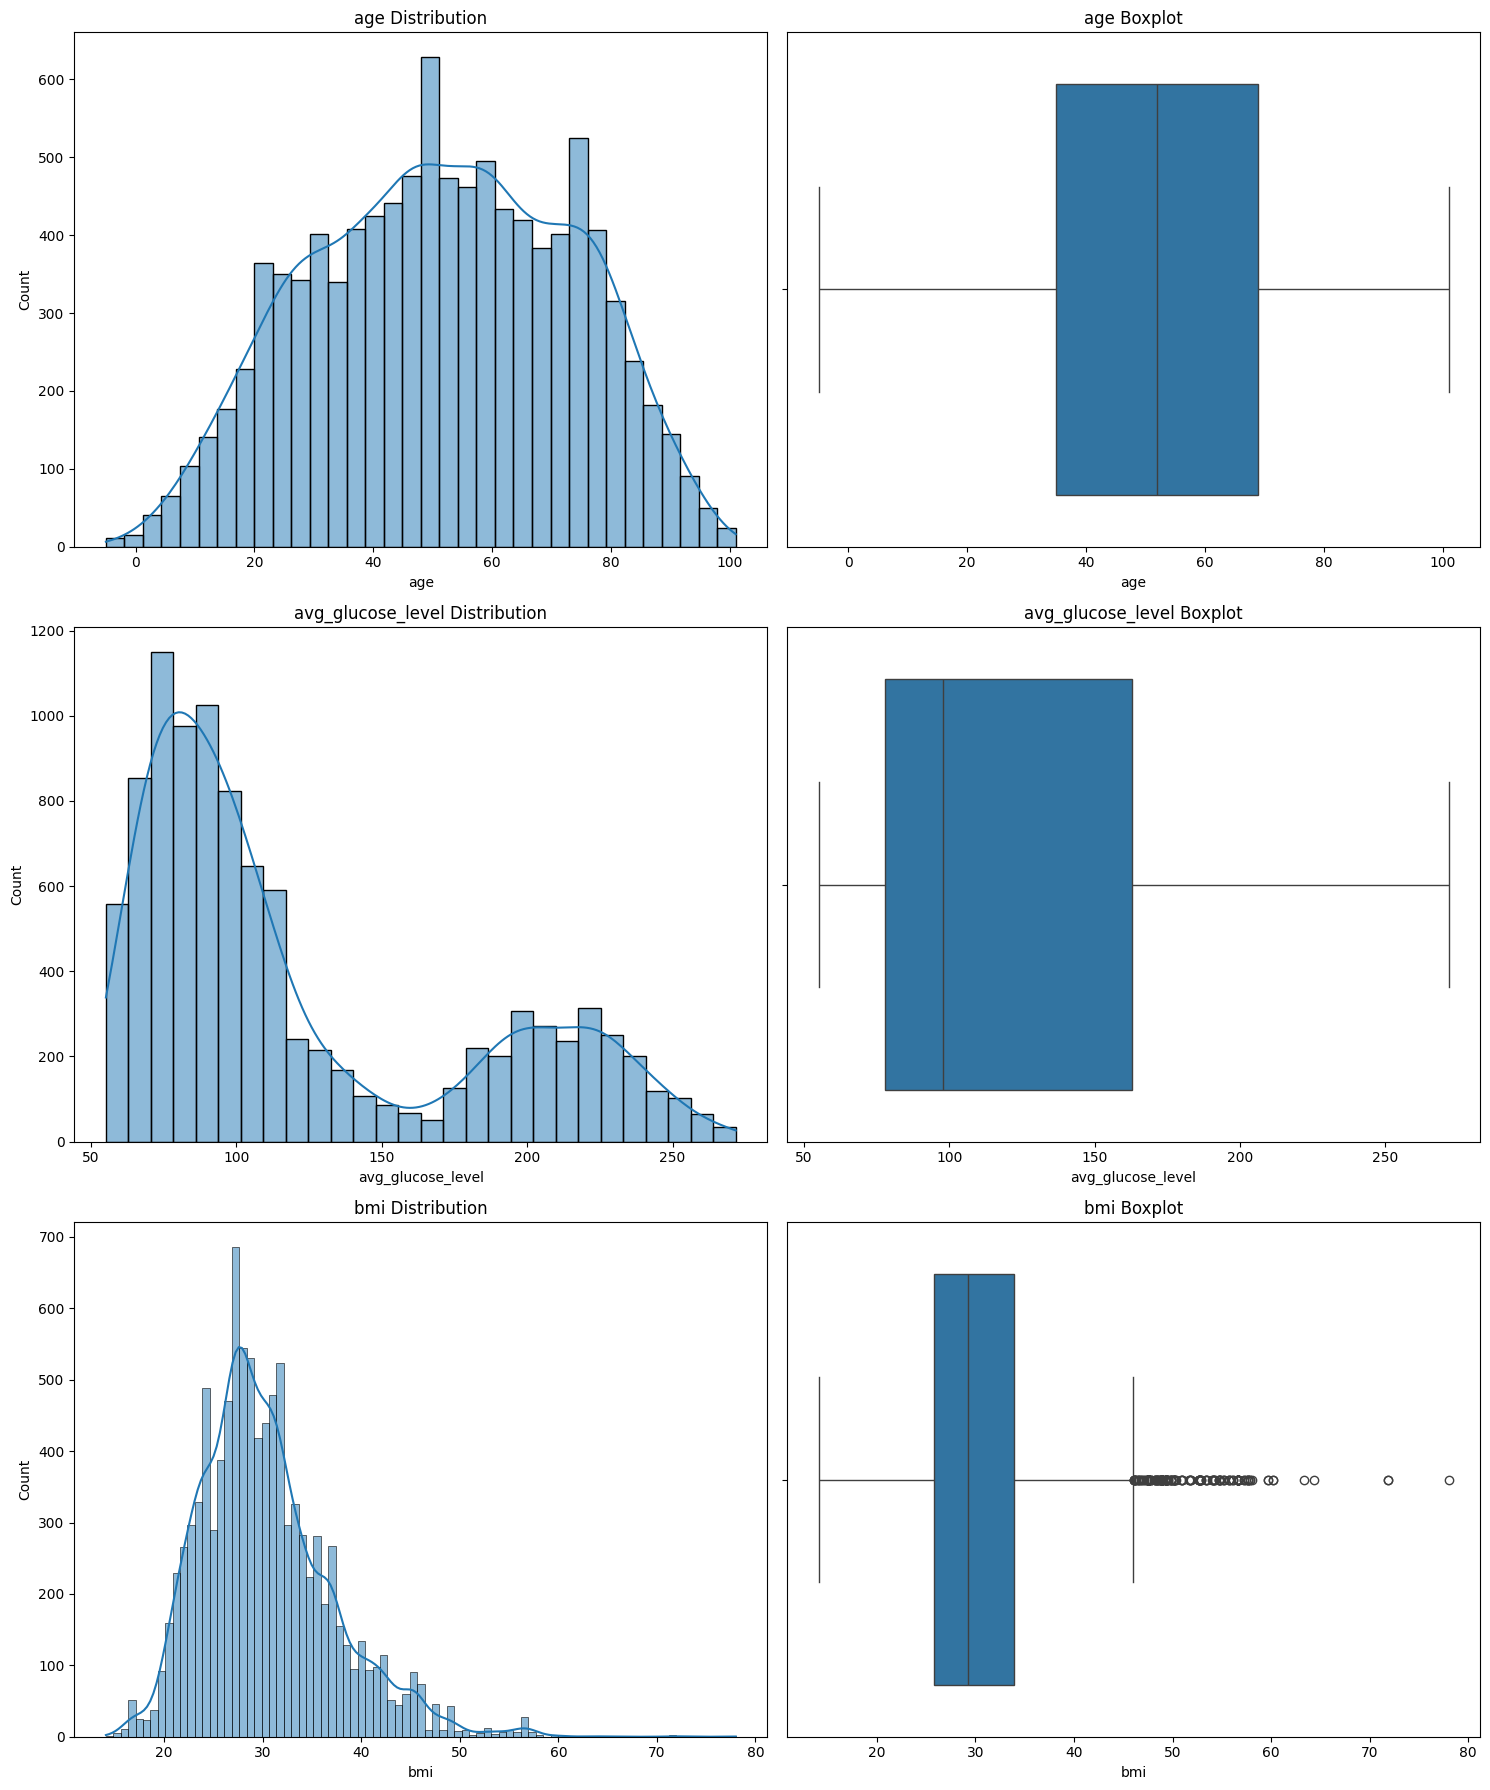

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['age', 'avg_glucose_level', 'bmi']

def plot_numerical_features():
    numerical_df = df[numerical_features]
    fig, axs = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(15, 6*len(numerical_features)))
    
    for i, column in enumerate(numerical_features):
        sns.histplot(data=numerical_df, x=column, kde=True, ax=axs[i][0])

        sns.boxplot(data=numerical_df, x=column, ax=axs[i][1])
        
        axs[i][0].set_title(f'{column} Distribution')
        axs[i][1].set_title(f'{column} Boxplot')
        
    plt.tight_layout()
    plt.show()

plot_numerical_features()


Correlation matrix

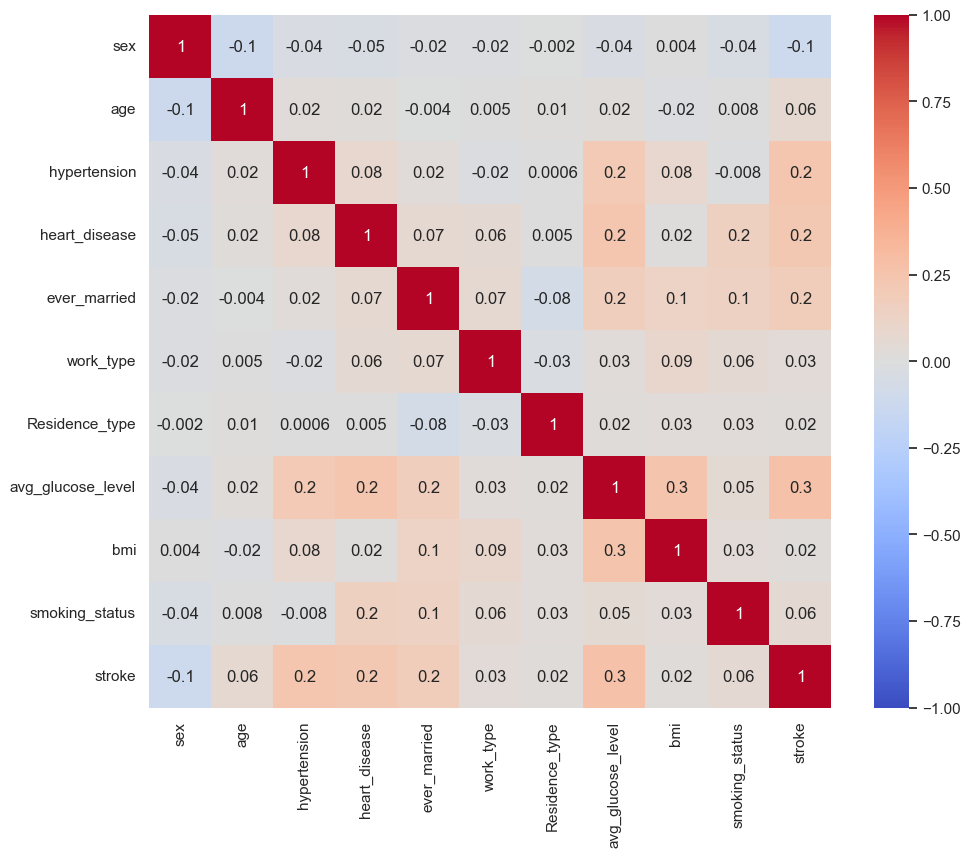

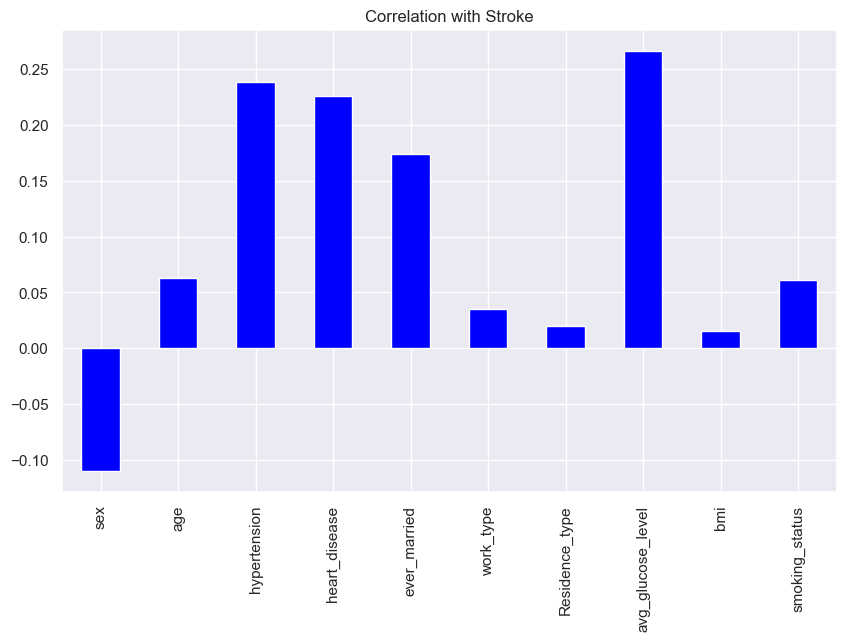

In [6]:
sns.set(rc = {'figure.figsize':(11,9)})
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')


plt.figure(figsize=(10, 6))
df_corr_with_stroke = df.corrwith(df['stroke']).drop('stroke')
df_corr_with_stroke.plot(kind='bar', grid=True, title="Correlation with Stroke", color="blue")
plt.show()

Correlation and distribution plots between dataset numerical features and target feature

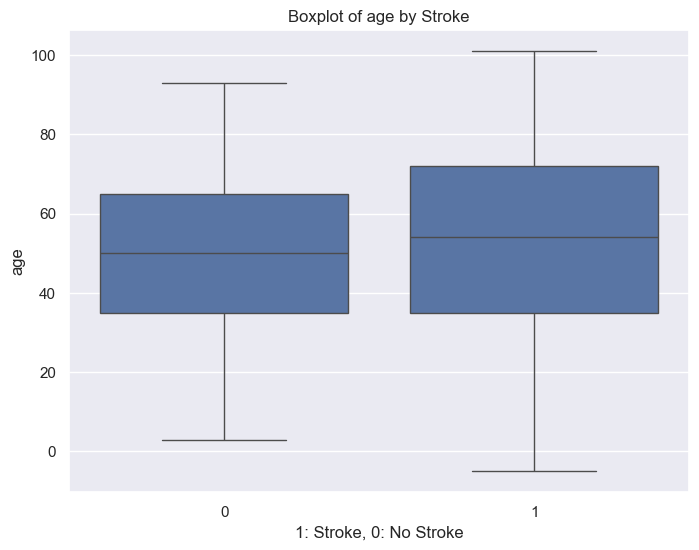

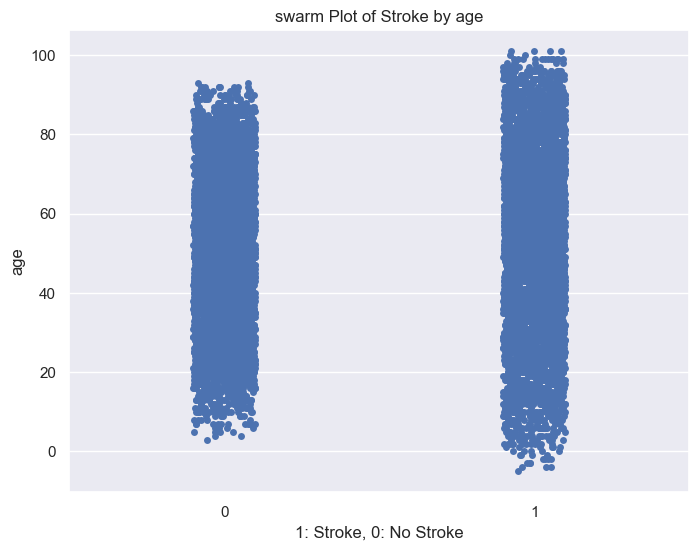

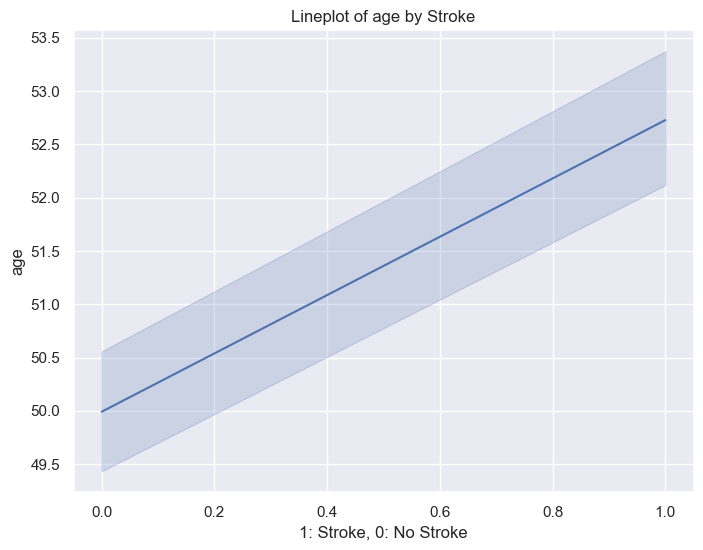

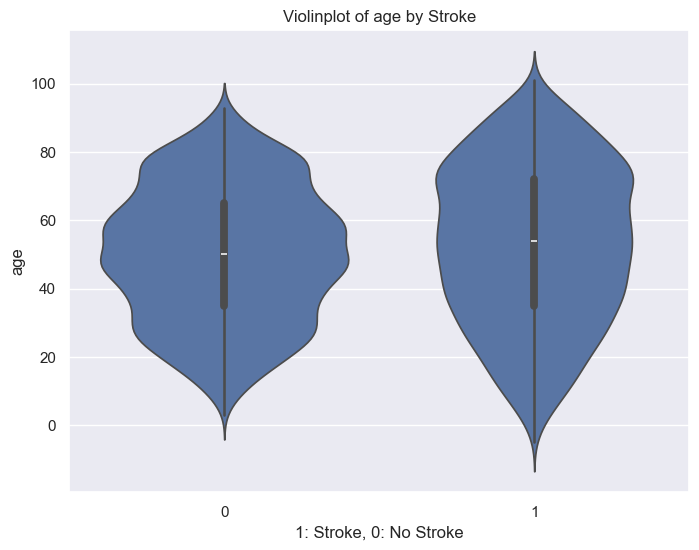

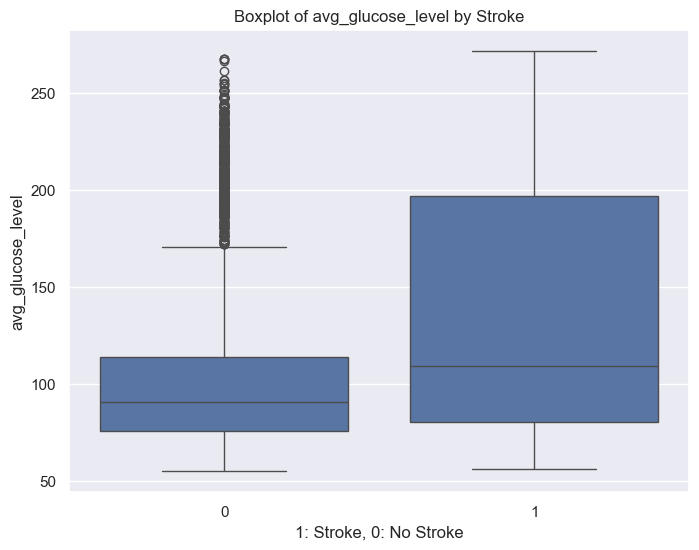

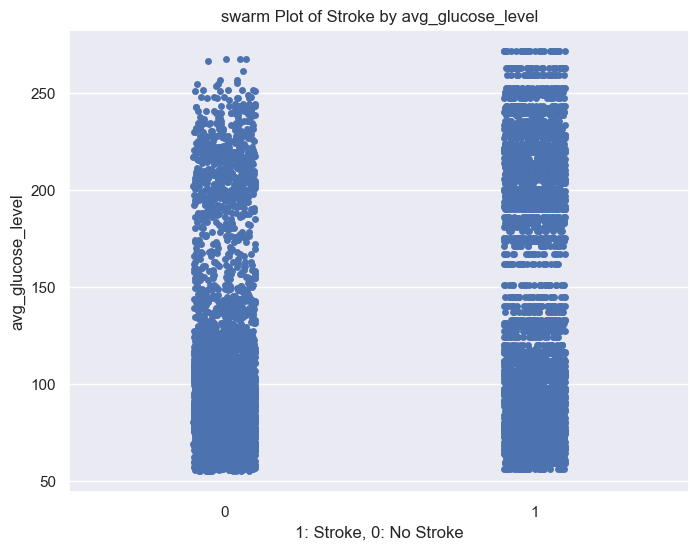

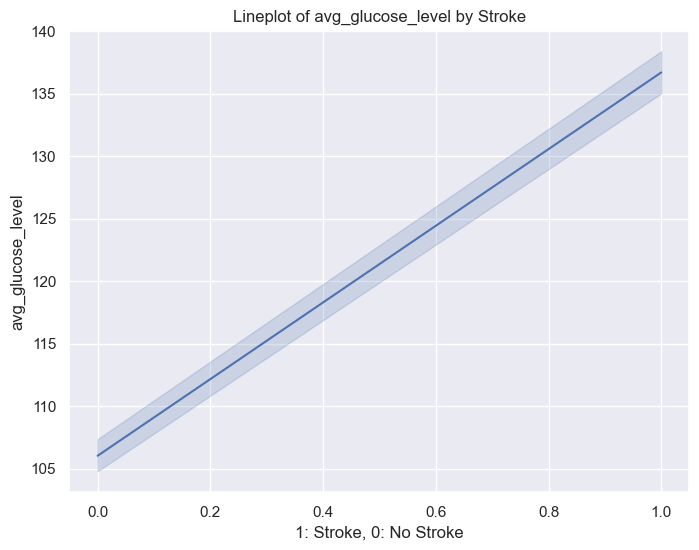

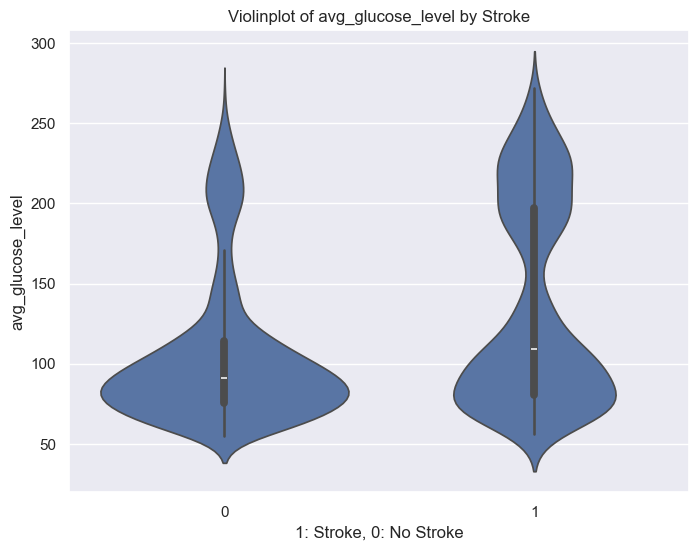

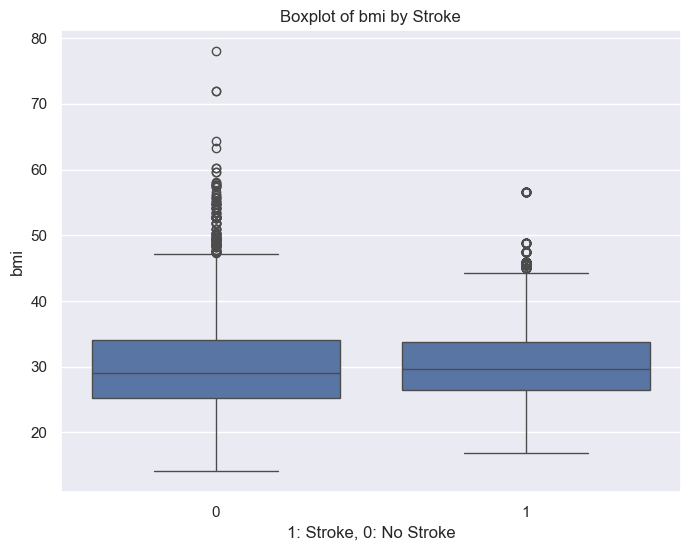

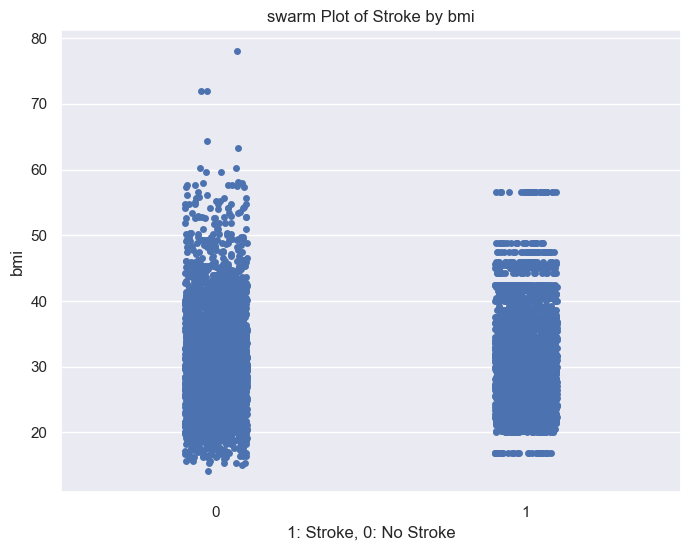

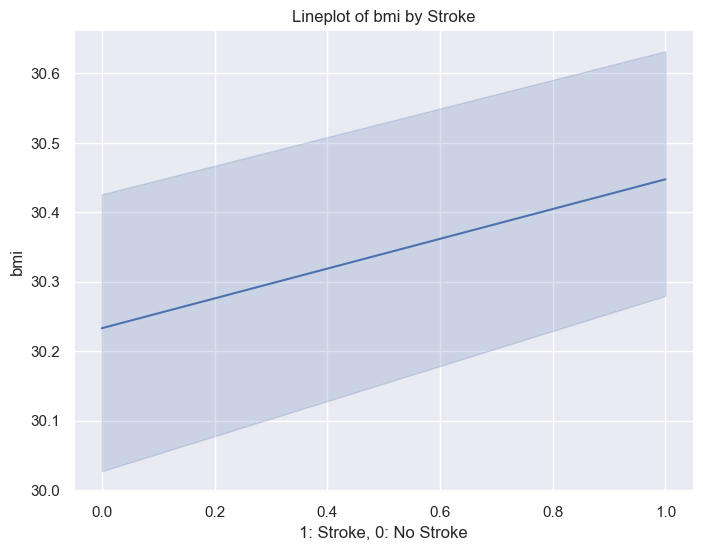

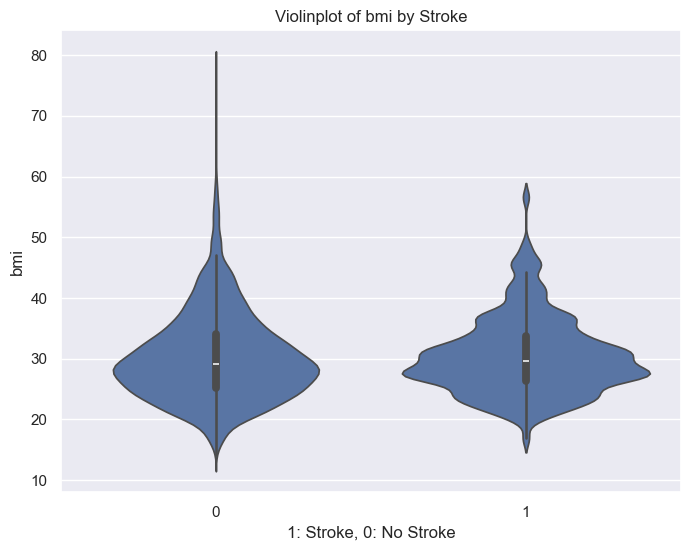

In [7]:
def print_plots():
    numerical_features = ['age', 'avg_glucose_level', 'bmi']
    for column in numerical_features:
        print_box_plot(column)
        print_strip_plot(column)
        print_line_plot(column)
        print_violin_plot(column)
        
    
def print_strip_plot(column):
    plt.figure(figsize=(8, 6))
    sns.stripplot(data=df, x='stroke', y=column)
    plt.title('swarm Plot of Stroke by ' + column)
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
def print_box_plot(column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x="stroke", y=column)
    plt.title(f'Boxplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
def print_line_plot(column):
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=df, x='stroke', y=column)
    plt.title(f'Lineplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
    
def print_violin_plot(column):
    plt.figure(figsize=(8,6))
    sns.violinplot(data=df, x="stroke", y=column)
    plt.title(f'Violinplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
print_plots()

comparison between categorical features and target

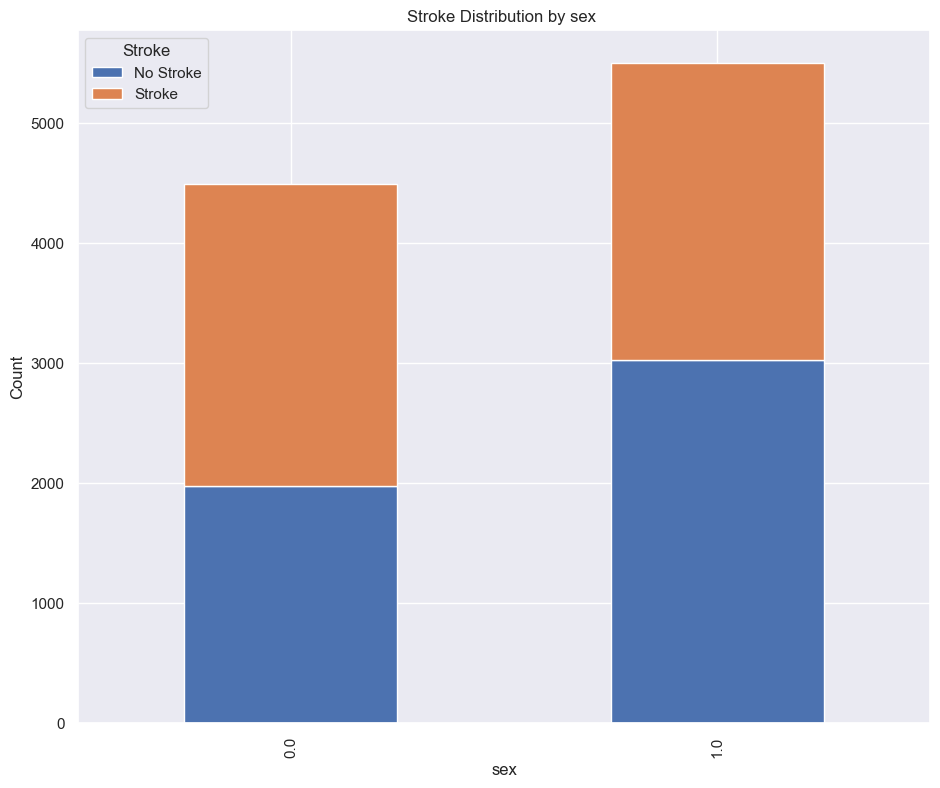

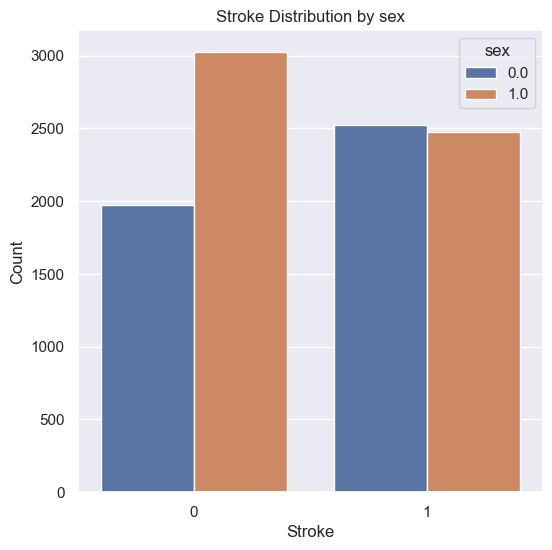

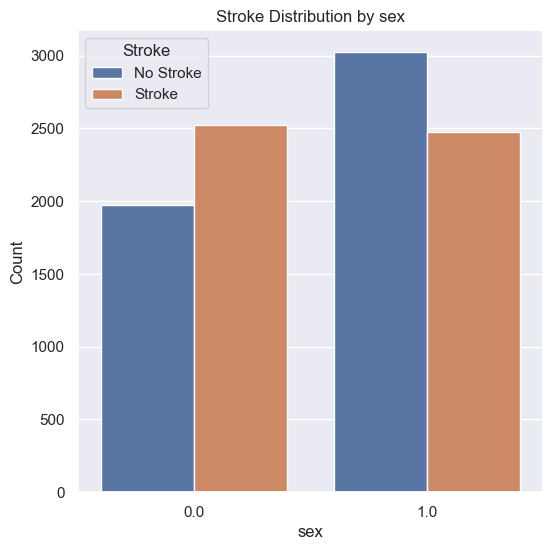

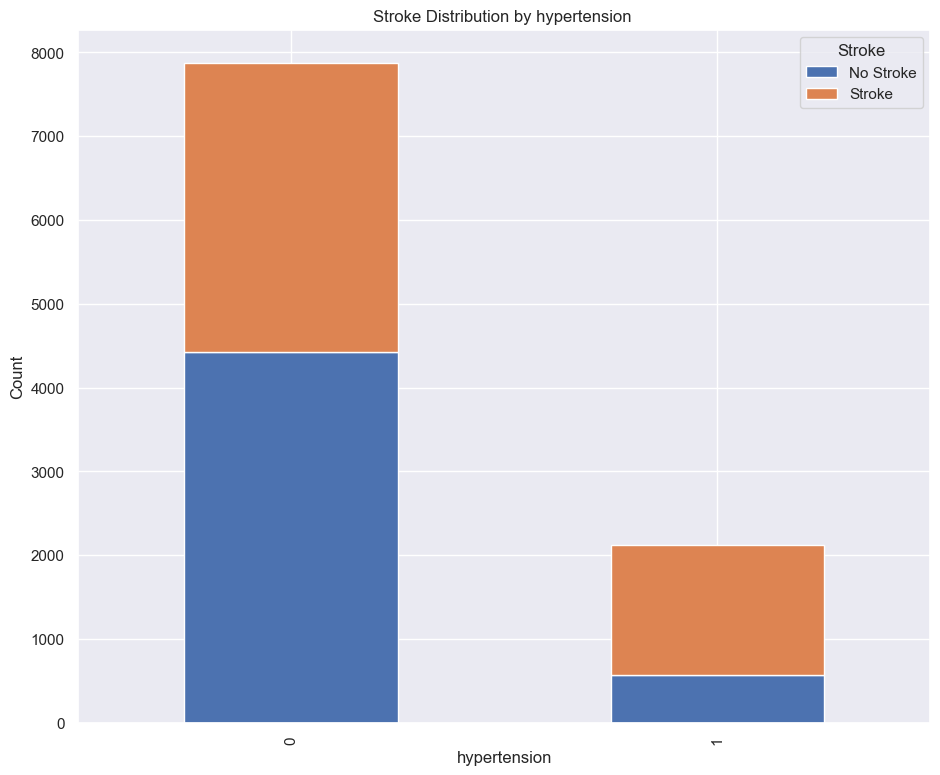

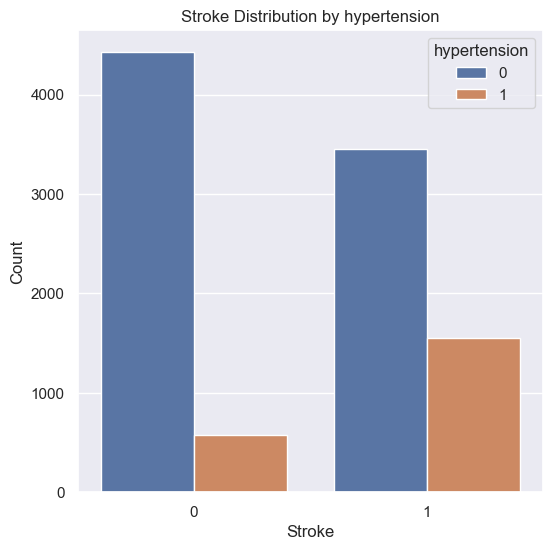

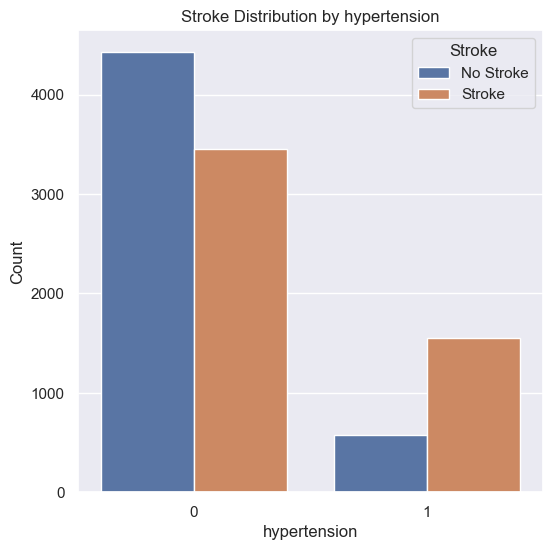

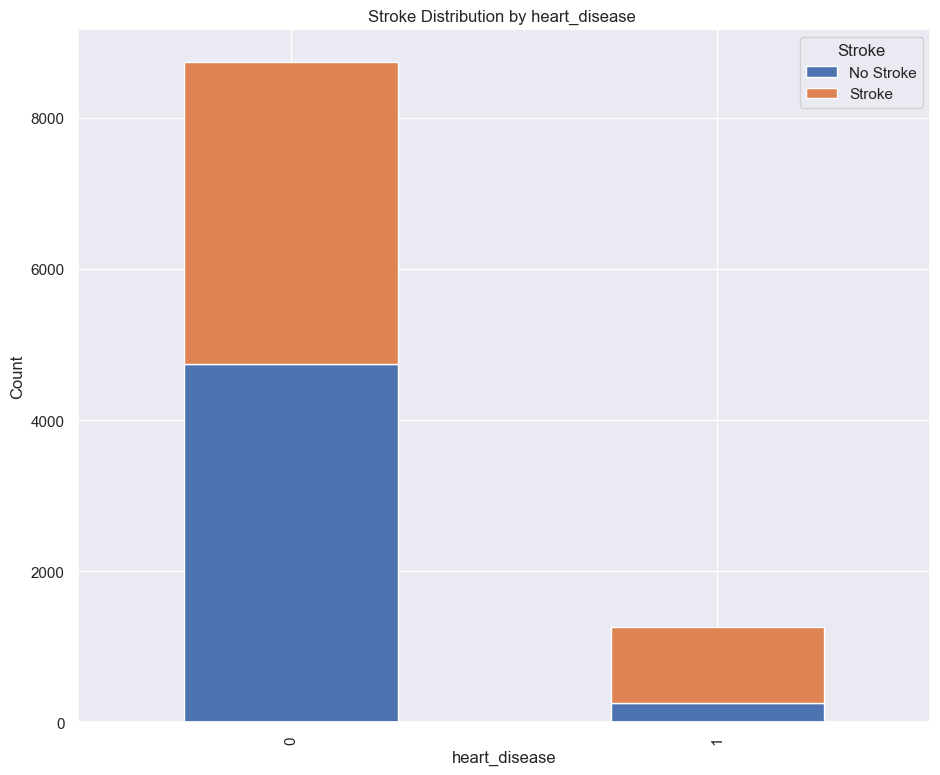

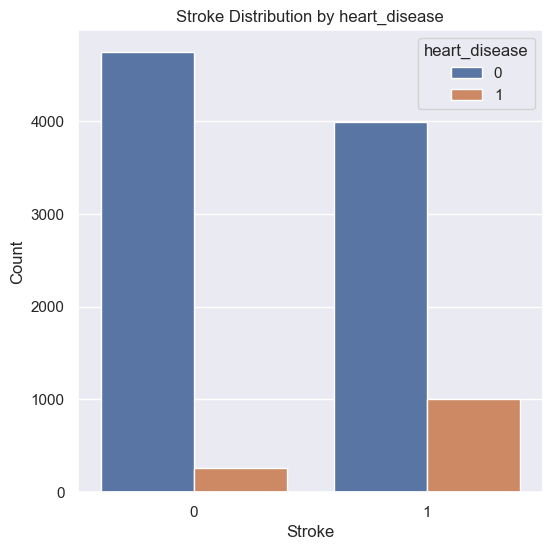

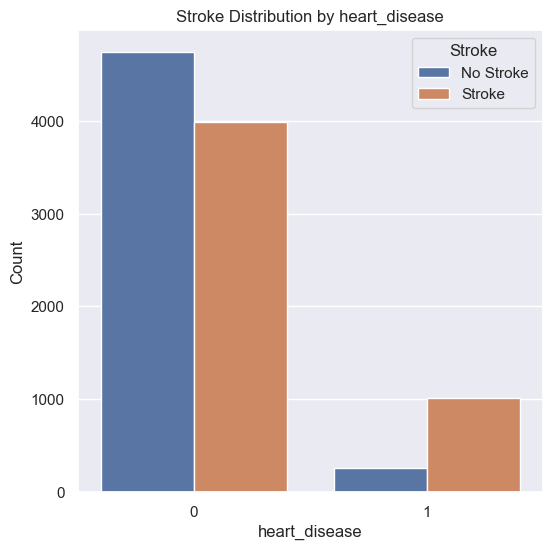

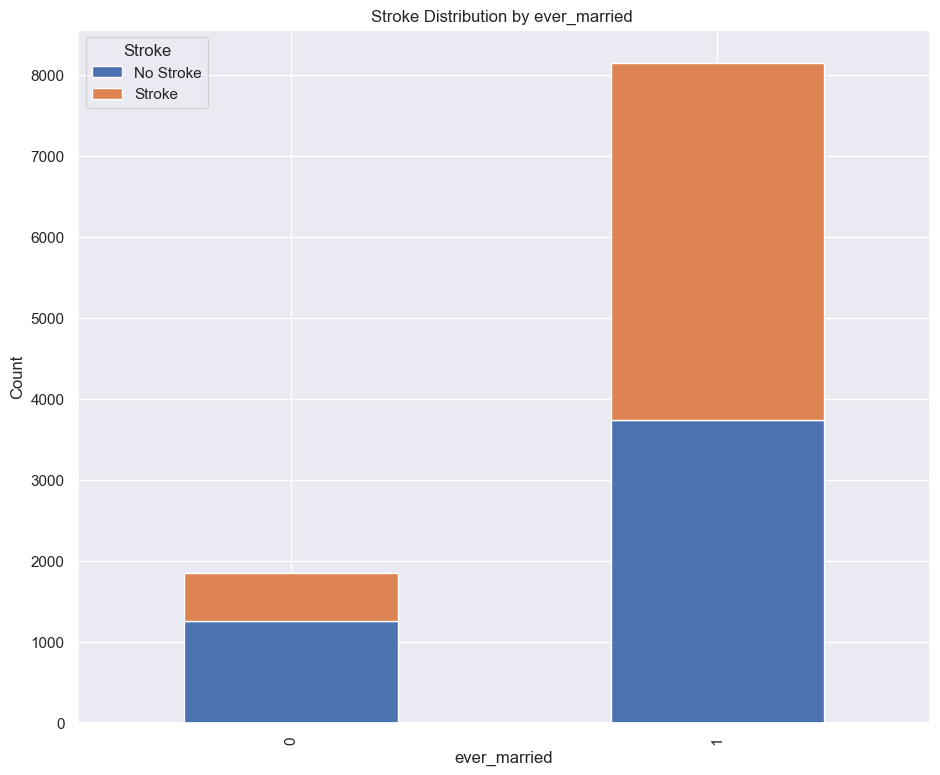

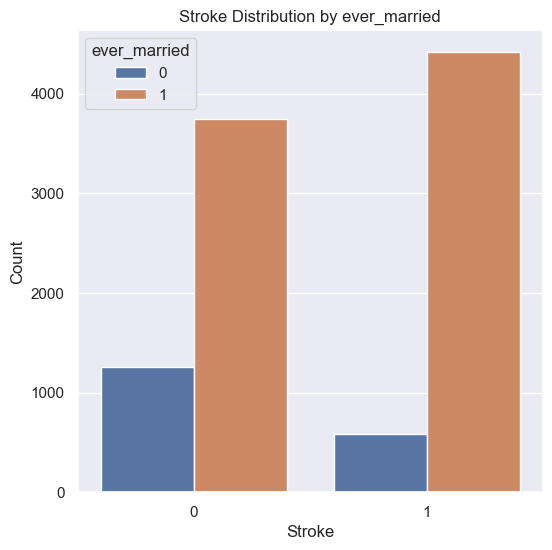

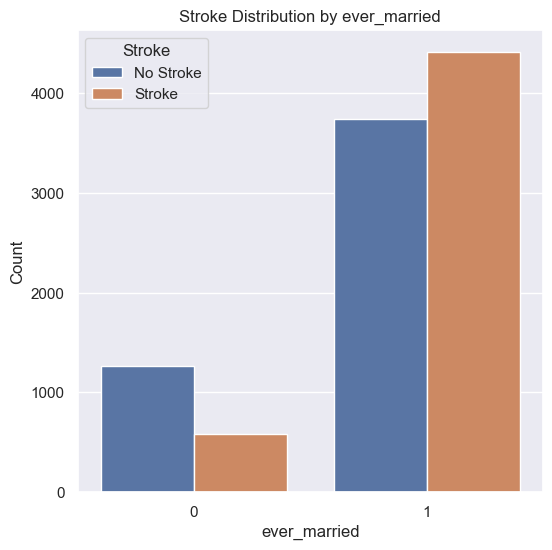

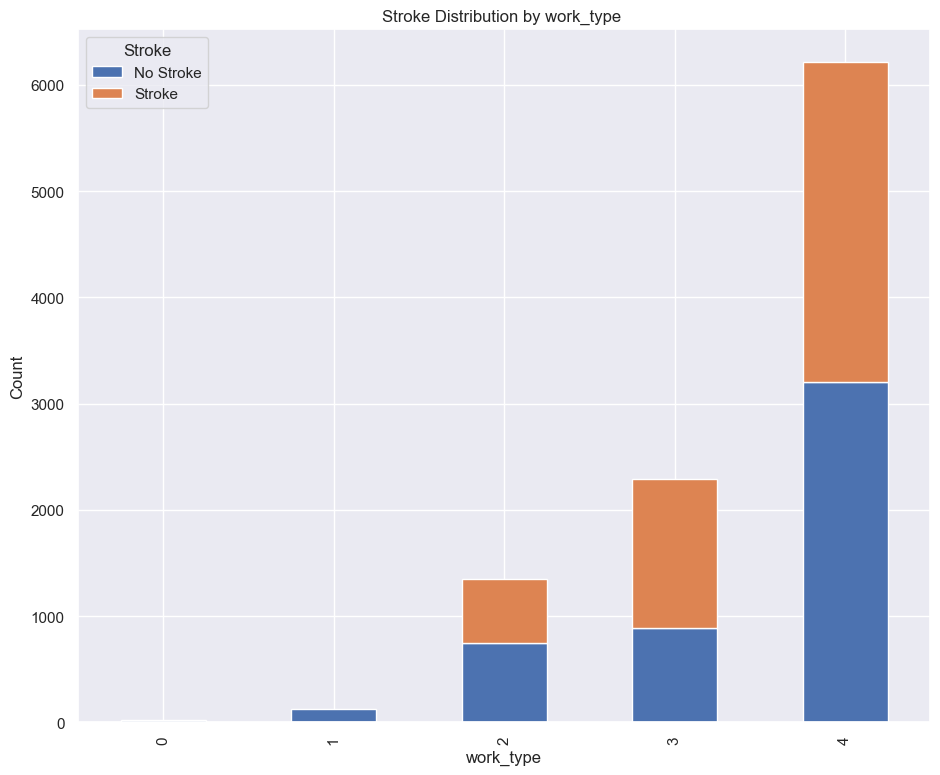

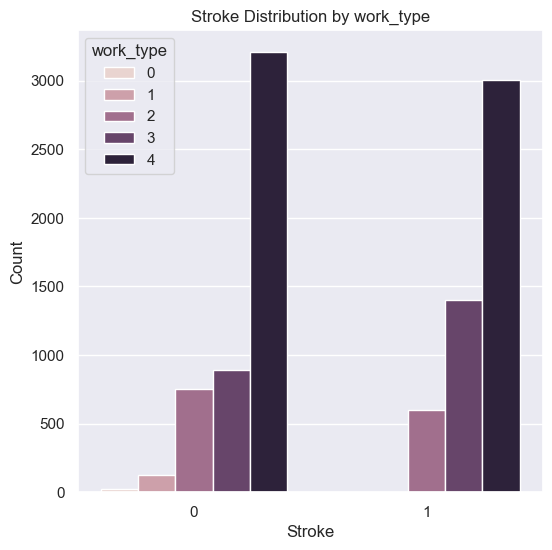

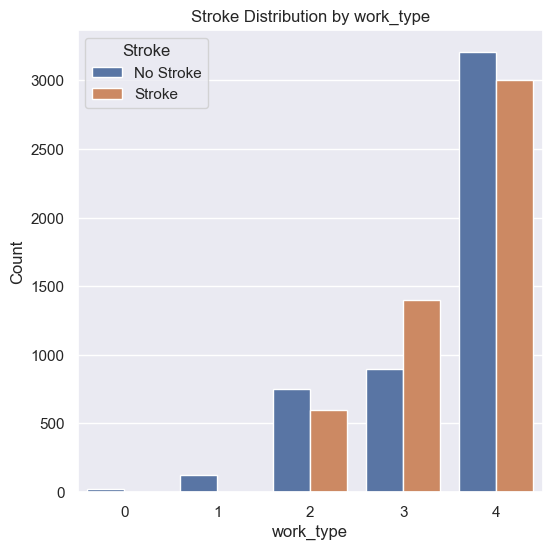

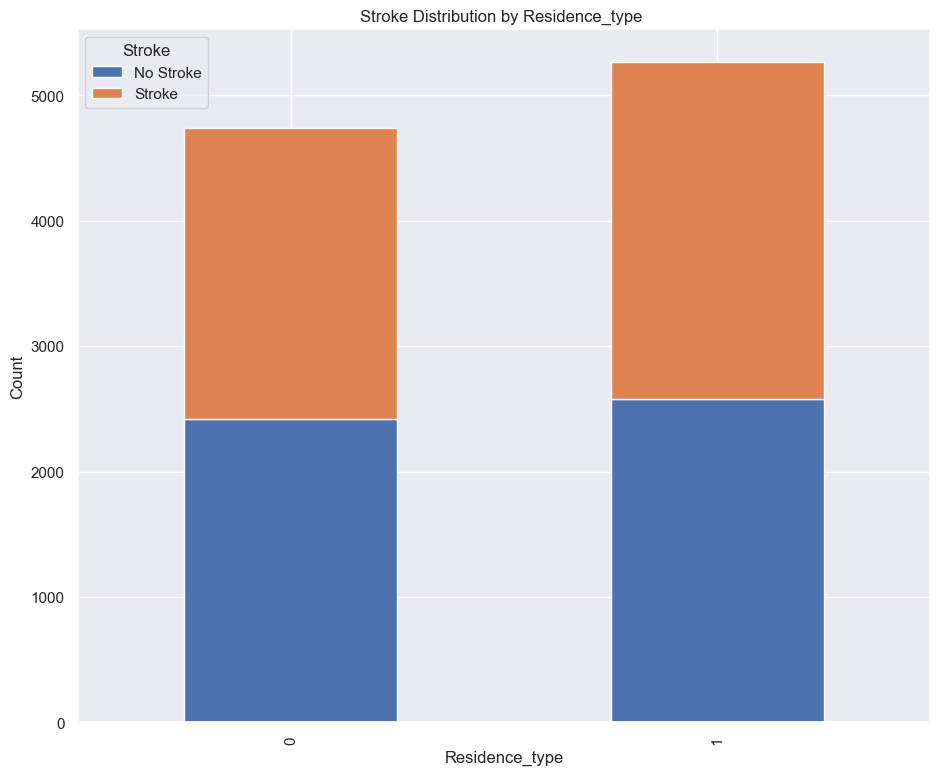

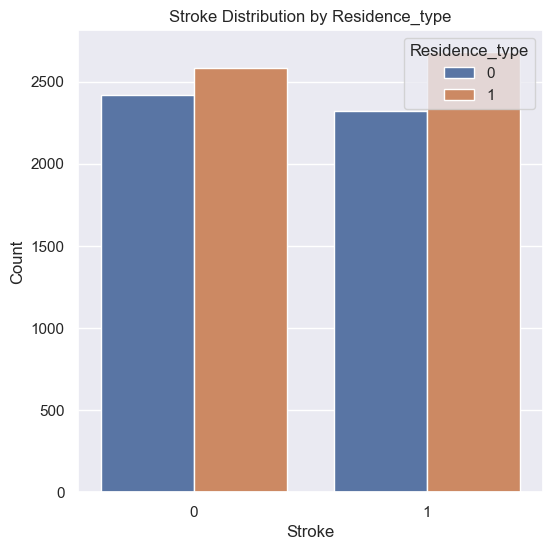

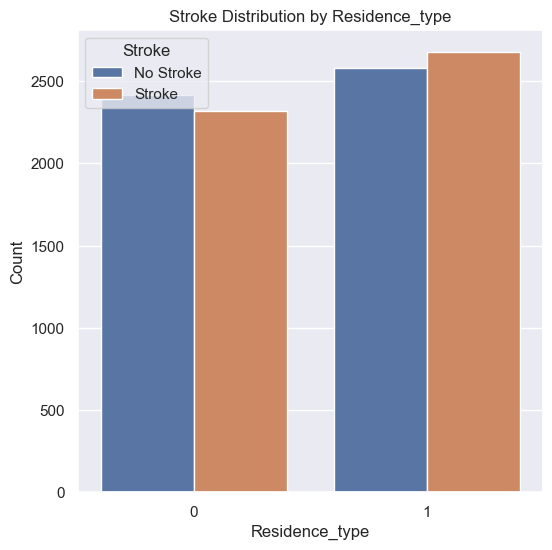

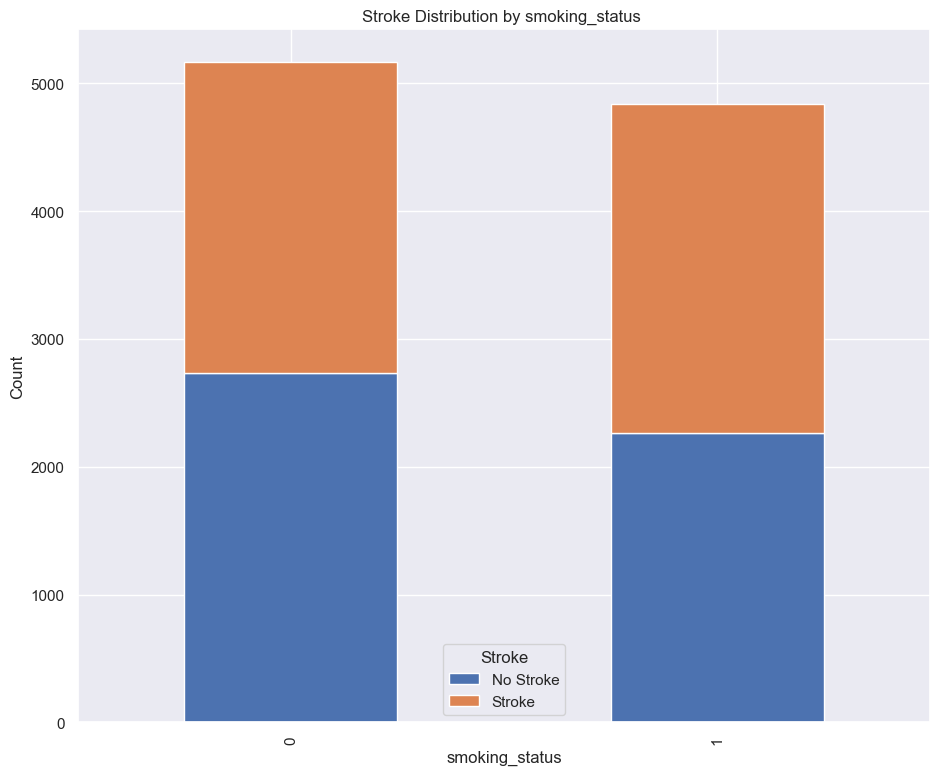

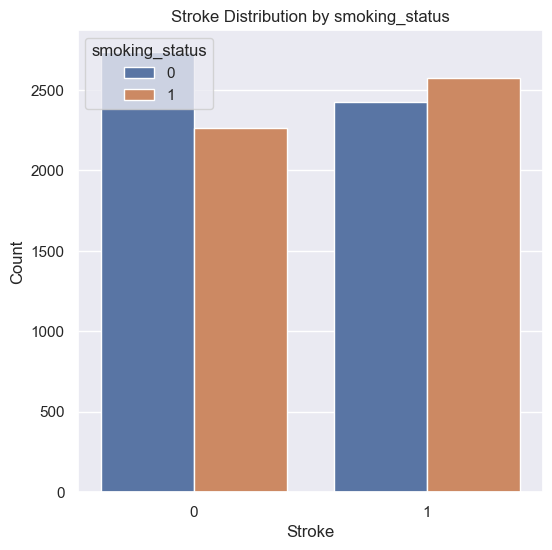

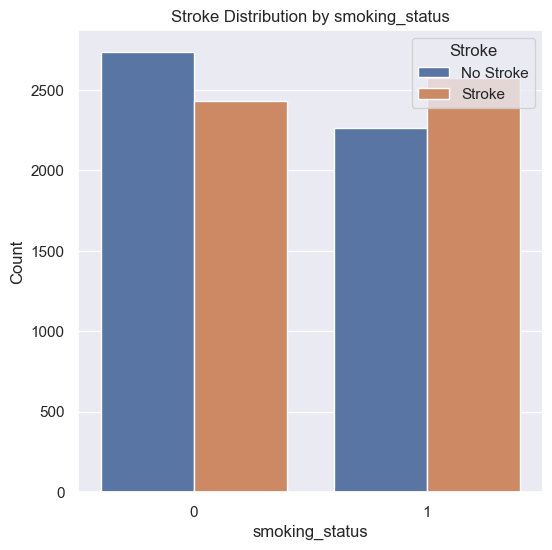

In [22]:

categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

def print_stacked_barchart(column):
    grouped = df.groupby([column, 'stroke']).size().unstack()
    grouped.plot(kind='bar', stacked=True)
    plt.title(f'Stroke Distribution by {column} ')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
    plt.show()
    
def print_barchart(column):
    plt.figure(figsize=(6, 6))
    sns.countplot(x='stroke', hue=column, data=df)
    plt.title(f'Stroke Distribution by {column}')
    plt.xlabel('Stroke')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.show()
    
def print_piechart(column):
    plt.figure(figsize=(6, 6))
    sns.pieplot(x=column, hue='stroke', data=df)
    plt.title(f'Stroke Distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
    plt.show()
    
def print_plots():
    for column in categorical_features:
        print_stacked_barchart(column)
        print_barchart(column)
        print_piechart(column)

print_plots()